In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("moovit.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Country                                                                                   150 non-null    object 
 1   City                                                                                      150 non-null    object 
 2   Average time travel by public transport (Min)                                             150 non-null    int64  
 3   Percentage of people that ride public transport more than 2 hour everyday (%)             150 non-null    float64
 4   Average waiting time at station (Min)                                                     150 non-null    int64  
 5   Percentage of people that wait longer than 20 mins (%)   

In [ ]:
df['Rating'] = np.where(df['Percentage of people that wait longer than 20 mins (%)'] < 30, 'Good', 'Bad')

x = df.iloc[0:150, 2:5]
y = df.loc[0:150, 'Rating']

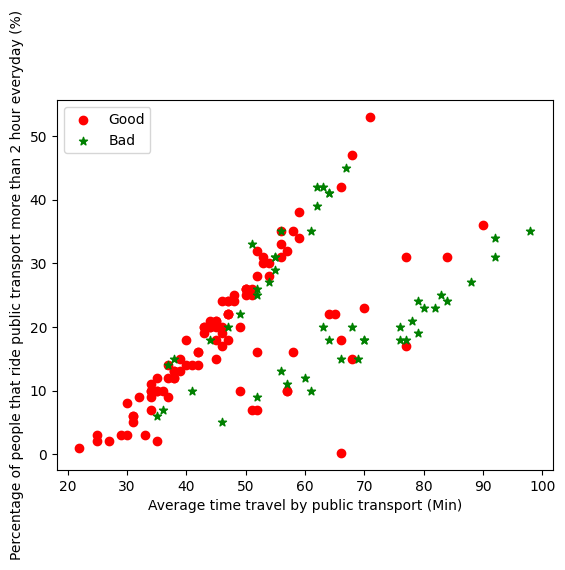

In [ ]:
plt.scatter(df['Average time travel by public transport (Min)'][df['Rating'] == 'Good'], df['Percentage of people that ride public transport more than 2 hour everyday (%)'][df['Rating'] == 'Good'], color='red', marker='o', label='Good')
plt.scatter(df['Average time travel by public transport (Min)'][df['Rating'] == 'Bad'], df['Percentage of people that ride public transport more than 2 hour everyday (%)'][df['Rating'] == 'Bad'], color='green', marker='*', label='Bad')
plt.xlabel('Average time travel by public transport (Min)')
plt.ylabel('Percentage of people that ride public transport more than 2 hour everyday (%)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.27, C = 1)

svm.fit(x, y)

y_pred = svm.predict(x)

print(accuracy_score(y, y_pred))

1.0
